## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [54]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [55]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [56]:
df.shape

(294478, 5)

b. Use the below cell to find the number of rows in the dataset.

In [57]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [58]:
type(df['timestamp'][0])    # needs to be converted to date datatype

str

In [59]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [60]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [61]:
df['user_id'].nunique()             


290584

In [62]:
print('Number of unique users is:', df.user_id.nunique() )

Number of unique users is: 290584


In [63]:
#Notes:
# .unique includes missing values
# sum(df['user_id'].duplicated())        # number of duplications

d. The proportion of users converted.

In [64]:
print('Proportion of users converted:',df['converted'].mean())

# NOTE proportion of unique users converted:
print('Proportion of unique users converted is:', df.query('converted == 1 ').user_id.nunique()  / df.user_id.nunique())

Proportion of users converted: 0.11965919355605512
Proportion of unique users converted is: 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [65]:
nr_mismatches = df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')").shape[0] 
print('Number of times new_page and treatment dont line up: ',nr_mismatches)

Number of times new_page and treatment dont line up:  3893


In [66]:
# Alternative way to identify the number of mismatches via groupby-statement:
df.groupby('group') ['landing_page'].value_counts() 

group      landing_page
control    old_page        145274
           new_page          1928
treatment  new_page        145311
           old_page          1965
Name: landing_page, dtype: int64

In [67]:
#(df.query('group == "treatment"') ['converted'] == 0).count()

# REFERENCE CODE OF EXAMPLE:

#(df.query('has_cancer')['test_result'] == 'Positive').count()
#  dit werkt ook:   (df.query('has_cancer == True')['test_result'] == 'Positive').mean()

In [68]:
df[df['landing_page'] == 'old_page'] ['user_id'].count()

147239

f. Do any of the rows have missing values?

In [69]:
# there are no null values:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<br><br>`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [70]:
df2=df
df2.drop(df.query("(group == 'treatment' and landing_page == 'old_page') or (group == 'control' and landing_page == 'new_page')").index, inplace=True)

In [71]:
# Double Check all of the correct rows were removed - this should be 0
df2[    ((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page'))  == False].shape[0]

0

<br><br>`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [72]:
print('Number of unique users in the dataset:',df2['user_id'].nunique())

Number of unique users in the dataset: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [73]:
df2[df2.duplicated(['user_id'], keep=False)] ['user_id'].unique()      # note: keep=False is default setting

array([773192])

c. What is the row information for the repeat **user_id**? 

In [74]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [75]:
df2.drop_duplicates(['user_id'],inplace=True)

In [76]:
df2.duplicated(['user_id']).sum()

0

<br><br>`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [77]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [78]:
p_control = df2.query('group == "control"') ['converted'].mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [79]:
p_treatment = df2.query('group == "treatment"') ['converted'].mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [80]:
print('New page probablity is:' , df2[df2['group'] == 'treatment'].shape[0]   / df2.shape[0] )

New page probablity is: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

From results we can see that treatment group (landing_page=new_page) has a somewhat lower conversion than the control group (landing_page=old_page):

In [81]:
df2.groupby('group') ['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

In [82]:
p_difference = p_control - p_treatment

print('The p_difference of real dataset "ab_data.csv" is: ', p_difference )

The p_difference of real dataset "ab_data.csv" is:  0.0015782389853555567


In [83]:
print('The procentual difference is:', p_difference / p_control)

The procentual difference is: 0.01310978845894809


This minor 1.3% **lower** conversion rate of the new treatment page suggests that there is NOT sufficient evidence to say that the new treatment page leads to **more** conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<br><br>**Since there is a directional component associated with this statement, a greater-equal to seems most reasonable.**

$$H_0: \mu_{old} - \mu_{new} >= 0$$


$$H_1: \mu_{old} - \mu_{new} < 0$$


**$\mu_{old}$ and $\mu_{new}$ are the conversion rates for the 'control group (with old_page)' and 'treatment group (with new_page)', respectively.**

<br><br>`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [84]:
p_new = df2['converted'].mean()
print('Convert rate for p_new under the null:', p_new)

Convert rate for p_new under the null: 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [85]:
p_old = df2['converted'].mean()
print('Convert rate for p_new under the null:', p_old)

Convert rate for p_new under the null: 0.11959708724499628


c. What is $n_{new}$?

In [86]:
n_new = df2.query('group == "treatment"') ['user_id'].count()
print('n_new is:', n_new)

n_new is: 145310


d. What is $n_{old}$?

In [87]:
n_old = df2.query('group == "control"') ['user_id'].count()
print('n_old is:', n_old)

n_old is: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [88]:
new_page_converted = np.random.binomial(n_new,p_new)
print('new_page_converted: ',new_page_converted)

new_page_converted:  17724


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [89]:
old_page_converted = np.random.binomial(n_old,p_old)
print('old_page_converted :', old_page_converted)

old_page_converted : 17345


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [90]:
p_new = (new_page_converted/n_new)
p_new

0.12197371137567958

In [91]:
p_old = (old_page_converted/n_old)
p_old

0.11939507413577102

In [92]:
p_new - p_old

0.00257863723990856

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [93]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

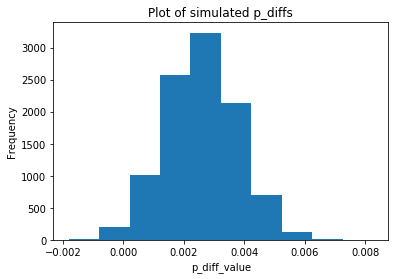

In [94]:
plt.hist(p_diffs);
plt.ylabel('Frequency')
plt.xlabel('p_diff_value')
plt.title('Plot of simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [95]:
p_diff_orig = df[df['landing_page'] == 'new_page']['converted'].mean() -  df[df['landing_page'] == 'old_page']['converted'].mean()
print('p_diff from ab_data.csv :: ',p_diff_orig)


p_diff from ab_data.csv ::  -0.0015782389853555567


In [96]:
p_diffs = np.array(p_diffs)
p_value = (p_diff_orig < p_diffs).mean()
print('proportion of p_diffs greater than p_diffs from ab_data.csv:', p_value)

proportion of p_diffs greater than p_diffs from ab_data.csv: 0.9999


In [97]:
p_diffs.mean()

0.0025916439087454854

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We are calculating the p-value. If null hypothesis($H_{0}$) is true then p-value gives the probability of statistics tested. In this case, the new page doesn't have better conversion rates than the old page since pvalue (0.9) is much lager dan alpha (0.05).  ==> So null hypothesis is NOT REJECTED.** <br><br>

In following histogram you can see the 'actual difference between old and new pages' observed in ab_data.csv plotted via the red vertical line. Its positioin is not far from mean illustrates that null hypothesis is true.

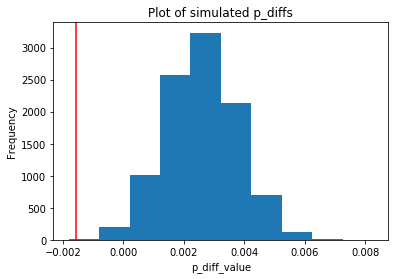

In [98]:
# 
plt.hist(p_diffs);
plt.ylabel('Frequency')
plt.xlabel('p_diff_value')
plt.title('Plot of simulated p_diffs');
plt.axvline(x=p_diff_orig, color='r');

<br><br>l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the number of rows associated with the old page and new pages, respectively.

In [99]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

convert_old = sum(df2.query("landing_page == 'old_page'")['converted'])
convert_new = sum(df2.query("landing_page == 'new_page'")['converted'])
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

In [100]:
convert_old, n_old, convert_old/n_old

(17489, 145274, 0.1203863045004612)

In [101]:
convert_new, n_new, convert_new/n_new

(17264, 145310, 0.11880806551510564)

<br><br>m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [102]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('z_score:', z_score)
print('p_value:', p_value)

z_score: 1.3109241984234394
p_value: 0.9050583127590245


In [103]:
from scipy.stats import norm
# significant of z-score
print(norm.cdf(z_score))

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


<br><br>
n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-score is a measure of how many standard deviations below or above the population mean a raw score is. <br><br>
We find that the z-score of 1.31 is less than the critical value of 1.64 which means we can't reject the null hypothesis. We find that old page conversions are slightly better than new page conversions. 
Even though the values are different from findings in parts j. and k the Zscore suggests there is no significant difference between old page and new page conversions.**



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistical regression because of its sigmoid function with values in range 0-1.<br><br>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [104]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [105]:
df2['intercept'] = 1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])     # apparently the 'control' label is linked to a '1'
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [106]:
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


<br><br>c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [107]:
import statsmodels.api as sm
import scipy.stats as stats

logit_df2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_df2.fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<br><br>d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [108]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        21:08:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value  of this logistic regression model (with group-dummy as variable; 1 is equal to that individual receives treatment) is 0.19. The p-value here suggests that that new page is not statistically significant as 0.19 > 0.05 .<br><br>
In part II was the p-value 0.905.<br><br>
In this section it was a two sided test and in Part II it was a one sided test. So here we test for not equal in our hypotheses whereas in Part II the alternative hypothesis was that new page would result in a higher conversion.**


>*Note: in part II the hypothesis was:**
>$$H_0: \mu_{old} - \mu_{new} >= 0$$
>$$H_1: \mu_{old} - \mu_{new} < 0$$
>**$\mu_{old}$ and $\mu_{new}$ are the conversion rates for the 'control group (with old_page)' and 'treatment group (with new_page)', respectively.*

<br><br>f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Given the low p-value of the ab_page variable (thus the influence of new_page is not significant) one should consider other variables to  identify stronger relationships and to improve the fit. <br><br>
Disadvantage could be that adding several variables could result in multicollinearity when we have predictor variables who are correlated with one  another resulting in unreliable and contradictory results compared to previous results.

<br><br>g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [109]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [110]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0


In [111]:
### method to create the necessary dummy variables and join extra column in-one-go:

df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [112]:
# we need to drop one of the three country dummy variables (CA in casu):
df_new.drop(labels=['CA'], axis=1, inplace=True)
df_new.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [129]:
import statsmodels.api as sm
import scipy.stats as stats

logit_df_new = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
results1 = logit_df_new.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [130]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        21:13:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [131]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,0,1


**The country variables 'UK' and 'US' are not statistically significant as 0.19 > 0.05 although their p-values is higher than that of the 'ab_page' variable (p-value = 0.19).**


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [132]:
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']

In [133]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,0,1


In [139]:
import statsmodels.api as sm
import scipy.stats as stats

logit_df_new = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page', 'US_ab_page', 'UK_ab_page']])
results2 = logit_df_new.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [140]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        21:15:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

Adding the variable 'ab_page' and the interaction variables 'ab_page_UK' and 'ab_page_US' degrades the p-value of the variables 'UK' and 'US.

Also the p-values of 'ab_page' and the 2 interaction variables are larger than 0.05 so not relevant.  

Thus interaction variables are not relevant variables. Thus null hypothesis is NOT REJECTED.


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [119]:

from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0